# Name of the Author : KILINDO BULAMBO Vainqueur

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading Data from CVS File

In [3]:
data = pd.read_csv('/home/irvainqueur/Documents/Sparks Foundation Tasks/task1.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# ED Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.shape

(25, 2)

In [8]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

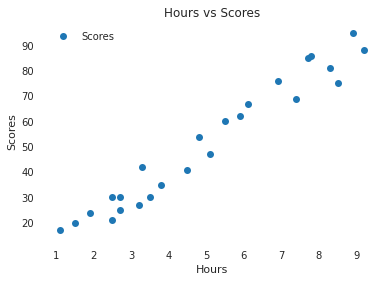

In [29]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Separating inputs and labels

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Training the model

In [10]:
#Spliting the data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

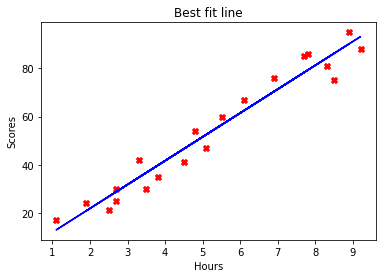

In [11]:
plt.scatter(X_train, y_train,color='red', marker='X')
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Best fit line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Testing the model

In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Predicted value vs actual value

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434683
[9.91065648]


# Predicted Score for 9.25 hours of studing 

In [15]:
val = np.array([9.25]).reshape(-1, 1)
print(regressor.predict(val))

[93.69173249]


# Model Evaluation

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
